## Data Cleaning
The Condition, zipcode column in kings county dataset has been dummycoded. We have dropped id, date varaibales as we think it deesnot add any meaning. The Preprocessed dataset is then stores in the name as kingcounty. 

In [487]:
#data cleaning
import numpy as np
import pandas as pd
dataframe = pd.read_csv('C:/Users/Ramkumar/Documents/Fall 17 subjects/ML/home_price.csv')
mapping_condition = {1:'con_1',2:'con_2',3:'con_3',4:'con_4',5:'con_5'}
for elem in dataframe['condition'].unique():
    dataframe[mapping_condition[elem]] = dataframe['condition'] == elem
    dataset
dataframe_zipcode_preprocessed = pd.concat([dataset.drop('zipcode', axis=1), pd.get_dummies(dataset['zipcode'])], axis=1)
dataframe_zipcode_preprocessed['YNrenovated']= 0
dataframe_zipcode_preprocessed.loc[ dataset_zipcode_preprocessed['yr_renovated'] >= 1, 'YNrenovated'] = 1
#dataframe_zipcode_preprocessed = dataset_zipcode_preprocessed.drop(98148,axis = 1)
kingscounty=dataframe_zipcode_preprocessed.drop(['id','yr_renovated','sqft_living15','sqft_above',"date",'lat','long','condition','con_1'], axis = 1)
kingscounty.columns
kingsmain = dataframe
list(dataframe)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'con_3',
 'con_5',
 'con_4',
 'con_1',
 'con_2']

## Linear Regression Interpretation



In [488]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#kingscounty = pd.read_csv('C:/Users/Ramkumar/Documents/Fall 17 subjects/ML/home_price.csv')
#feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
feature_names = [ 'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors',    'waterfront',          'view',
               'grade', 'sqft_basement',      'yr_built',    'sqft_lot15',
               'con_3',         'con_5',         'con_4',         'con_2', 'YNrenovated']
                 #98001,           98002,           98003,           98004,
                 #98005,           98006,           98007,           98008,
                 #98010,           98011,           98014,           98019,
                 #98022,           98023,           98024,           98027,
                 #98028,           98029,           98030,           98031,
                 #98032,           98033,           98034,           98038,
                 #98039,           98040,           98042,           98045,
                 #98052,           98053,           98055,           98056,
                 #98058,           98059,           98065,           98070,
                 #98072,           98074,           98075,           98077,
                 #98092,           98102,           98103,           98105,
                 #98106,           98107,           98108,           98109,
                 #98112,           98115,           98116,           98117,
                 #98118,           98119,           98122,           98125,
                 #98126,           98133,           98136,           98144,
                 #98146,           98155,           98166,           98168,
                 #98177,           98178,           98188,           98198,
                 #98199,   'YNrenovated']
      
print(feature_names)
X_kingscounty = kingscounty[feature_names] 
y_kingscounty = kingscounty['price']

X_train, X_test, y_train, y_test = train_test_split(X_kingscounty, y_kingscounty, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
list(X_kingscounty)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'yr_built', 'sqft_lot15', 'con_3', 'con_5', 'con_4', 'con_2', 'YNrenovated']
linear model coeff (w): [ -3.58e+04   3.68e+04   1.71e+02   1.83e-02   2.67e+04   6.03e+05
   4.36e+04   1.24e+05   7.99e+00  -3.44e+03  -5.37e-01  -4.44e+04
   7.43e+03  -2.87e+04  -3.69e+04   2.22e+04]
linear model intercept (b): 6050323.073
R-squared score (training): 0.656
R-squared score (test): 0.645


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_basement',
 'yr_built',
 'sqft_lot15',
 'con_3',
 'con_5',
 'con_4',
 'con_2',
 'YNrenovated']

# Linear Regression Interpretation 

The Linear Regression model is run for the kingscounty dataset by using selected features. We are getting a r-squared value of 65.6% for training set and 64.5% for test dataset. The Variable interpreation for each value is as follows, 

1. With one room increase in bedroom there is a decrease in price by -3.58e+04
2. With one bathroom increase in bedroom there is a increase in price by +3.68e+04
3. With one unit increase in sqft_living there is a increase in price by 1.71e+02
4. With one unit increase in sqft_lot there is a increase in price by +1.83e-02
5. With one unit increase in floors there is a increase in price by +2.67e+04
6. With one unit increase in waterfront there is a increase in price by +6.03e+05
7. With one unit increase in view there is a increase in price by +4.36e+04
8. With one unit increase in grade there is a increase in price by +1.24e+05
9. With one unit increase in yr_built there is a increase in price by +7.99e+00
10. With one unit increase in sqft_lots there is a decrease in price by -3.44e+03
11. With one unit increase in Yrrenovated there is a increase in price by 2.22e+04


# Polynomial Regression

The intutuive idea is to take a subset of data and run polynomial regression on the data to find whether the power term of the features have any real effect on our dependent variable. We have ran polynomial regression for the degrees 1,2,3,4 and validating the dataset for polynomial regression using 4 sample datasets. 

The training and test score is .7480 and 0.6131 for the all the polynomial degress. The predicted scores and the actual scores for price is plotted using scatter plot. The best degree in polynomial regression will be 2. 

In [408]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [383]:
x = pd.read_csv('C:/Users/Ramkumar/Documents/Fall 17 subjects/ML/home_price.csv')
kingscounty2 = x.iloc[1:100,0:22]

print(kingscounty2)

            id             date    price  bedrooms  bathrooms  sqft_living  \
1   6414100192  20141209T000000   538000         3       2.25         2570   
2   5631500400  20150225T000000   180000         2       1.00          770   
3   2487200875  20141209T000000   604000         4       3.00         1960   
4   1954400510  20150218T000000   510000         3       2.00         1680   
5   7237550310  20140512T000000  1225000         4       4.50         5420   
6   1321400060  20140627T000000   257500         3       2.25         1715   
7   2008000270  20150115T000000   291850         3       1.50         1060   
8   2414600126  20150415T000000   229500         3       1.00         1780   
9   3793500160  20150312T000000   323000         3       2.50         1890   
10  1736800520  20150403T000000   662500         3       2.50         3560   
11  9212900260  20140527T000000   468000         2       1.00         1160   
12   114101516  20140528T000000   310000         3       1.00   

In [409]:
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
X_kingscounty = kingscounty2[feature_names] 
print(X_kingscounty)
y_kingscounty = kingscounty2['price']

X_train, X_test, y_train, y_test = train_test_split(X_kingscounty, y_kingscounty, random_state=0)
r2_train = []
r2_test = []



    bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1          3       2.25         2570      7242     2.0           0     0   
2          2       1.00          770     10000     1.0           0     0   
3          4       3.00         1960      5000     1.0           0     0   
4          3       2.00         1680      8080     1.0           0     0   
5          4       4.50         5420    101930     1.0           0     0   
6          3       2.25         1715      6819     2.0           0     0   
7          3       1.50         1060      9711     1.0           0     0   
8          3       1.00         1780      7470     1.0           0     0   
9          3       2.50         1890      6560     2.0           0     0   
10         3       2.50         3560      9796     1.0           0     0   
11         2       1.00         1160      6000     1.0           0     0   
12         3       1.00         1430     19901     1.5           0     0   
13         3

In [410]:
degree = [1,2,3,4]
for i in degree:
    #if(i==1 or i== 2):
    poly = PolynomialFeatures(degree = i)
    X_ = poly.fit_transform(X_train)
    predict_score = poly.fit_transform(y_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    print(i)
    print(linreg.score(X_train, y_train))
    print(linreg.score(X_test, y_test))

    #else:
        #print(i)
    r2_train.append(linreg.score(X_train, y_train))
    r2_test.append(linreg.score(X_test, y_test))


C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprec

1
0.613191344559
0.74808632228
2
0.613191344559
0.74808632228
3
0.613191344559
0.74808632228


C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


4
0.613191344559
0.74808632228


In [386]:
predict_Price = linreg.predict(X_test)

print(predict_Price)
print(r2_test)

[ 604449.07  653279.59  404795.71  276493.31  475590.7   597890.11
  543364.03  294931.83  717881.53  836967.95  760278.53  223795.11
  721513.79  639012.2   325356.35  335278.42  171797.13  283509.25
  342669.63  253113.62  184119.98  420710.56  457620.78  728873.98
   87864.93]
[0.74808632228028937, 0.74808632228028937, 0.74808632228028937, 0.74808632228028937]


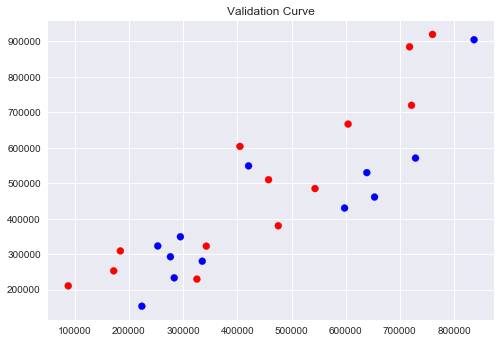

In [411]:
#validation curve for training and test set
import matplotlib.pyplot as plt
plt.scatter(predict_Price,y_test,color=('red','blue'))
plt.title('Validation Curve')
plt.show()

# Taking 4 subsets of data from main data

In [430]:
sample1= kingsmain[['bedrooms','bathrooms','sqft_living','yr_built', 'lat', 'long']]
sample2=kingsmain[['waterfront','grade','sqft_above', 'yr_renovated','sqft_living15','sqft_lot15']]
sample3=kingsmain[['waterfront','grade','sqft_living','yr_renovated','sqft_living15','yr_built', 'lat', 'long']]
sample4 = kingsmain[['bedrooms','bathrooms','sqft_living','waterfront','condition','sqft_lot15']]


       bedrooms  bathrooms  sqft_living  yr_built      lat     long
0             3       1.00         1180      1955  47.5112 -122.257
1             3       2.25         2570      1951  47.7210 -122.319
2             2       1.00          770      1933  47.7379 -122.233
3             4       3.00         1960      1965  47.5208 -122.393
4             3       2.00         1680      1987  47.6168 -122.045
5             4       4.50         5420      2001  47.6561 -122.005
6             3       2.25         1715      1995  47.3097 -122.327
7             3       1.50         1060      1963  47.4095 -122.315
8             3       1.00         1780      1960  47.5123 -122.337
9             3       2.50         1890      2003  47.3684 -122.031
10            3       2.50         3560      1965  47.6007 -122.145
11            2       1.00         1160      1942  47.6900 -122.292
12            3       1.00         1430      1927  47.7558 -122.229
13            3       1.75         1370      197

 # Subsetting the data into 4 samples and validating the polynominal
 ## sample1

(70, 6)
(70,)
(30, 6)
(30,)
(poly deg 2) R-squared score (training): 0.530
0.530162598426
0.610956950258


C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


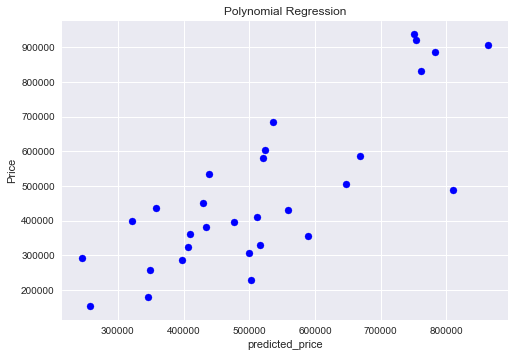

In [485]:
#X_kingscounty = kingscounty[feature_names] 
#print(X_kingsc)

y_kingsmain = kingsmain['price']
y_kingsmain1 = y_kingsmain[:100]
#x_kingsmain1 = x_kingsmain[,0:100]
z=kingsmain[['bedrooms','bathrooms','sqft_living']]
y=kingsmain['price']
sample1= kingsmain[['bedrooms','bathrooms','sqft_living','yr_built', 'lat', 'long']]
sample2=kingsmain[['bedrooms','grade','sqft_living15','sqft_lot15']]
sample3=kingsmain[['waterfront','grade','sqft_living','yr_renovated','sqft_living15','yr_built', 'lat', 'long']]
sample4 = kingsmain[['bedrooms','bathrooms','sqft_living','waterfront','condition','sqft_lot15']]
r2_train = []
r2_test = []
x = [sample1]
#print(x)


poly = PolynomialFeatures(degree = 2)
X_kingsmain = poly.fit_transform(i)
X_train, X_test, y_train, y_test = train_test_split(sample1[:100], y[:100], test_size = 0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_ = poly.fit_transform(X_train)
predict_score = poly.fit_transform(y_train)
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)
# print(y_train.shape)
#print(X_train)
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print(linreg.score(X_train,y_train))
print(linreg.score(X_test, y_test))
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()


## Sample2

(70, 4)
(70,)
(30, 4)
(30,)
(poly deg 2) R-squared score (training): 0.597
0.597187645551
-0.12947479524


C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


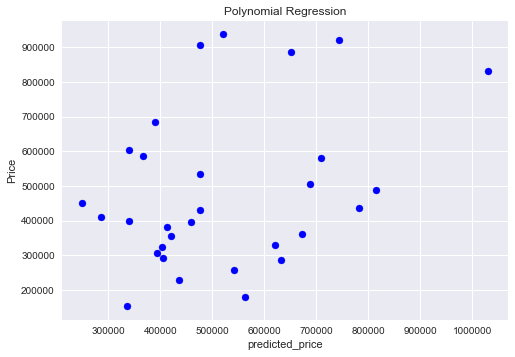

In [486]:

poly = PolynomialFeatures(degree = 2)
X_kingsmain = poly.fit_transform(i)
X_train, X_test, y_train, y_test = train_test_split(sample2[:100], y[:100], test_size = 0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_ = poly.fit_transform(X_train)
predict_score = poly.fit_transform(y_train)
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)
# print(y_train.shape)
#print(X_train)
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print(linreg.score(X_train,y_train))
print(linreg.score(X_test, y_test))
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()


## Sample3

(70, 8)
(70,)
(30, 8)
(30,)
(poly deg 2) R-squared score (training): 0.803
0.803181092196
0.052411734755


C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


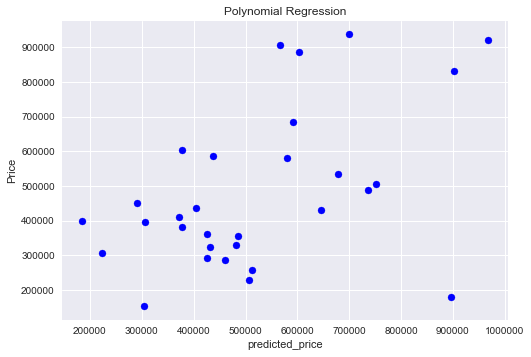

In [481]:
poly = PolynomialFeatures(degree = 2)
X_kingsmain = poly.fit_transform(i)
X_train, X_test, y_train, y_test = train_test_split(sample3[:100], y[:100], test_size = 0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_ = poly.fit_transform(X_train)
predict_score = poly.fit_transform(y_train)
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)
# print(y_train.shape)
#print(X_train)
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print(linreg.score(X_train,y_train))
print(linreg.score(X_test, y_test))
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()


## Sample 4

(70, 6)
(70,)
(30, 6)
(30,)
(poly deg 2) R-squared score (training): 0.512
0.512230921799
0.315191474714

C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


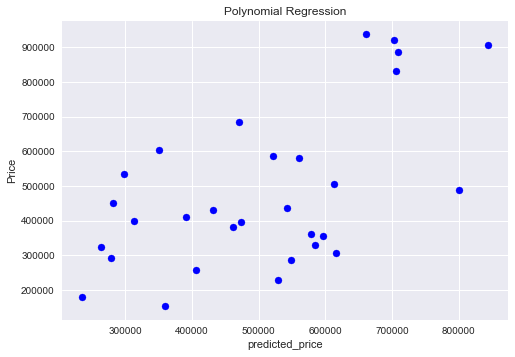

In [482]:
poly = PolynomialFeatures(degree = 2)
X_kingsmain = poly.fit_transform(i)
X_train, X_test, y_train, y_test = train_test_split(sample4[:100], y[:100], test_size = 0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_ = poly.fit_transform(X_train)
predict_score = poly.fit_transform(y_train)
clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)
linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)
# print(y_train.shape)
#print(X_train)
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print(linreg.score(X_train,y_train))
print(linreg.score(X_test, y_test))
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()


# Q3- RIDGE AND LASSO REGRESSION
### Alpha : Regularization strength 
## Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 


In [3]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

df = pd.read_csv('C:/Users/ejabham/Downloads/home_price.csv')
df.head()
list(df)

kingscounty = pd.read_csv('C:/Users/ejabham/Downloads/home_price.csv')
#kingscounty = x[:1000]

feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
X_kingscounty = kingscounty[feature_names] 
y_kingscounty = kingscounty['price']

#X_train, X_test, y_train, y_test = train_test_split(X_kingscounty, y_kingscounty, random_state=0)


poly = PolynomialFeatures(degree=2)
X_poly = np.array(poly.fit_transform(X_kingscounty))
#X_to_be_append = np.array(X_to_be_append)
#X_app_poly = np.concatenate((X_poly,X_to_be_append),axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_kingscounty,test_size = 0.3,random_state = 0)
polyreg = LinearRegression().fit(X_train, y_train)



C:\Users\ejabham\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
    
#We use Lasso and Ridge regression to achieve regularization using L1 and L2 penalty as polynomial regression might cause over fittingization using L1 and L2 penalty
print('Ridge regression on polynomial: effect of alpha regularization parameter\n')
for this_alpha in [0,0.0001, 0.001, 0.01, 0.1, 1,10,20]:
    
    #X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
        linridge= Ridge(alpha = this_alpha, normalize = True).fit(X_train, y_train)
        r2_train = linridge.score(X_train, y_train)
        r2_test = linridge.score(X_test, y_test)
        num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
        print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \ r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))



##### Lasso #######
# #### Lasso regression with regularization parameter: alpha

    
print('Lasso regression: effect of alpha regularization\n\parameter on number of features kept in final model\n')
for this_alpha in [2]:
    
#X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
        for alpha in [1, 2, 4, 6, 8,10,20,100]:
        
            linlasso = Lasso(alpha = this_alpha,normalize =True).fit(X_train, y_train)
            r2_train = linlasso.score(X_train, y_train)
            r2_test = linlasso.score(X_test, y_test)
#num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))



Ridge regression on polynomial: effect of alpha regularization parameter

Alpha = 0.000
num abs(coeff) > 1.0: 122, \ r-squared training: 0.81, r-squared test: 0.81

Alpha = 0.000
num abs(coeff) > 1.0: 94, \ r-squared training: 0.77, r-squared test: 0.77

Alpha = 0.001
num abs(coeff) > 1.0: 86, \ r-squared training: 0.76, r-squared test: 0.76

Alpha = 0.010
num abs(coeff) > 1.0: 80, \ r-squared training: 0.76, r-squared test: 0.76

Alpha = 0.100
num abs(coeff) > 1.0: 79, \ r-squared training: 0.75, r-squared test: 0.75

Alpha = 1.000
num abs(coeff) > 1.0: 76, \ r-squared training: 0.73, r-squared test: 0.72

Alpha = 10.000
num abs(coeff) > 1.0: 73, \ r-squared training: 0.62, r-squared test: 0.60

Alpha = 20.000
num abs(coeff) > 1.0: 70, \ r-squared training: 0.55, r-squared test: 0.53

Lasso regression: effect of alpha regularization
\parameter on number of features kept in final model



C:\Users\ejabham\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Alpha = 100.00
-squared test: 0.76



In [15]:
print('Lasso regression: effect of alpha regularization\nparameter on number of features kept in final model\n')
for this_alpha in [2]:
    #X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
        linlasso = Lasso(alpha = this_alpha,max_iter= 10000).fit(X_train, y_train)
        r2_train = linlasso.score(X_train, y_train)
        r2_test = linlasso.score(X_test, y_test)
        num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
        print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \ r-squared training: {:.2f}, r-squared test: {:.2f}\n'
            .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    


Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 2.000
num abs(coeff) > 1.0: 95, \ r-squared training: 0.77, r-squared test: 0.77



C:\Users\ejabham\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [2]:
# Now we will plot validation curves for choosing best alspha value for ridge regression:

# Building the train and test score
param_range = (0,0.0001,0.001,0.01,0.1,1)
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, test_scores = validation_curve(Ridge(normalize=True), X= X_kingscounty,y= y_kingscounty,
                                            param_name='alpha',
                                            param_range=param_range, cv=5)

 #np.logspace(-7, 3, 3))

# Building the validation curve

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Ridge')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)

plt.semilogx(r, train_scores_mean, label='Training score',
            color='Orange')
plt.fill_between(r, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha = 0.2,
                color='Orange')
plt.semilogx(r, test_scores_mean, label='Cross-validation score',
            color='blue')
plt.fill_between(r, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha = 0.2,
                color='blue')

plt.show()

# List of train and test squares
print("Mean Train scores : ", train_scores_mean)
print("Mean Test scores : ", test_scores_mean)

NameError: name 'X_kingscounty' is not defined

### If the training score and the test(validation) are both low, the estimator will be underfitting. If the training score is high and the test(validation) is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high test(validation) score is usually not possible.
### In the above case alpha = 0 produces the best result.

In [1]:
# Validation curves for Lasso regression (L1 regression) to select best alpha value

param_range = (1, 2, 4, 6, 8,10,20,100)
train_scores, test_scores = validation_curve(Lasso(normalize = True, max_iter = 10000), X= X_kingscounty,y= y_kingscounty,
                                            param_name='alpha',
                                            param_range=param_range, cv=3)

#(Ridge(normalize=True), X= X_kingscounty,y= y_kingscounty,
                                            #param_name='alpha',
                                            #param_range=param_range, cv=5)

# Building the validation curve
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Lasso')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='Orange')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha = 0.2,
                color='Orange')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='blue')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha = 0.2,
                color='blue')

plt.show()

# List of train and test squares
print("Mean Train scores : ", train_scores_mean)
print("Mean Test scores : ", test_scores_mean)

NameError: name 'validation_curve' is not defined

In [ ]:
### In the above case, Lasso regression alpha=1 produces the best result, therefore L1 penalty =1

In [ ]:
# With alpha = 1 for our linear regression 
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
X_kingscounty = kingscounty[feature_names] 
y_kingscounty = kingscounty['price']
col_list = X_kingscounty.columns

X_kingscounty_train, X_kingscounty_test, y_kingscounty_train, y_kingscounty_test = train_test_split(X_kingscounty, y_kingscounty,test_size = 0.3, random_state = 0)
lasso = Lasso(alpha=1, normalize=True, max_iter = 100000)
lasso.fit(X_kingscounty_train, y_kingscounty_train)


# Plot the coefficients
plt.plot(range(len(col_list)), lasso.coef_)
plt.xticks(range(len(col_list)), col_list, rotation=60)
plt.margins(0.02)
plt.ylabel('Coefficients')
plt.show()
pd.Series(lasso.coef_,index = col_list)

# KNN Classifer for Kingscounty dataset
The goal is to run K-nearest neighbour to the kingscounty dataset and find the optimal K value that best yields the lower mean RSS. 

In [307]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

r2_train= []
r2_test= []
np.set_printoptions(precision=2)
 
kingscounty = pd.read_csv('C:/Users/Ramkumar/Documents/Fall 17 subjects/ML/home_price.csv')

feature_names = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
X_kingscounty = kingscounty[feature_names] 
y_kingscounty = kingscounty['price']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

K_values = [1,2,3,4,5,6,7,8,9,10]
for i in K_values:
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train_scaled, y_train)
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train_scaled, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test_scaled, y_test)))
    r2_train.append(knn.score(X_train_scaled, y_train))
    r2_test.append(knn.score(X_test_scaled, y_test))
print(r2_train)
print(r2_test)



Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87
Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.93
Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.93
[1.0, 0.97727272727272729, 0.95454545454

* The optimal K value is 1 and that can be seen as K=1 has the lower Mean RSS value. The below plot validates the same. 

C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Ramkumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is 

The optimal number of neighbors is 1
[0.95833333333333337, 0.94404761904761902, 0.94166666666666665, 0.94404761904761902, 0.94404761904761902, 0.94404761904761902, 0.86071428571428577, 0.87738095238095237, 0.81309523809523798, 0.7321428571428571]


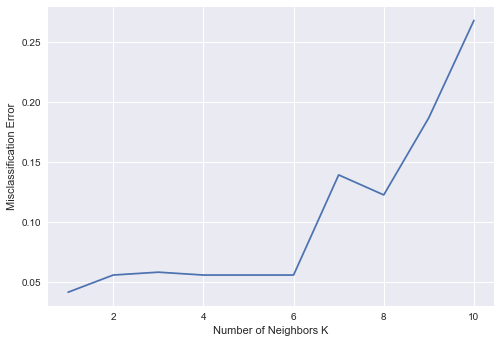

In [308]:
from sklearn.model_selection import cross_val_score
neighbors = [1,2,3,4,5,6,7,8,9,10]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

#printing cv_scores
print(cv_scores)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'grade', 'sqft_above', 'sqft_basement', 'yr_built' ,'yr_renovated' , 'zipcode'  ,'lat' ,'long' ]
X_kingscounty = kingscounty[feature_names] 
print(X_kingscounty)
y_kingscounty = kingscounty['price']

X_train, X_test, y_train, y_test = train_test_split(X_kingscounty, y_kingscounty, random_state=0)
r2_train = []
r2_test = []

poly = PolynomialFeatures(degree=2)
X_poly = np.array(poly.fit_transform(X_train))
X_to_be_append = np.array(X_to_be_append)
X_app_poly = np.concatenate((X_poly,X_to_be_append),axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_app_poly, y,test_size = 0.3, random_state = 0)

# Applying polynomial regression might lead to overfitting, we apply ridge and lasso regression to obtain 
# regularization using L1 and L2 penalty
print('Ridge regression on polynomial: effect of alpha regularization parameter\n')
for this_alpha in [0,0.0001, 0.001, 0.01, 0.1, 1,10,20]:
    
    #X_train, X_test, y_train, y_test = train_test_split(X_poly, y)
    linridge = Ridge(alpha = this_alpha, normalize = True).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \ r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

    bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1          3       2.25         2570      7242     2.0           0     0   
2          2       1.00          770     10000     1.0           0     0   
3          4       3.00         1960      5000     1.0           0     0   
4          3       2.00         1680      8080     1.0           0     0   
5          4       4.50         5420    101930     1.0           0     0   
6          3       2.25         1715      6819     2.0           0     0   
7          3       1.50         1060      9711     1.0           0     0   
8          3       1.00         1780      7470     1.0           0     0   
9          3       2.50         1890      6560     2.0           0     0   
10         3       2.50         3560      9796     1.0           0     0   
11         2       1.00         1160      6000     1.0           0     0   
12         3       1.00         1430     19901     1.5           0     0   
13         3

NameError: name 'X_to_be_append' is not defined